In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
financial_info = pd.read_csv("/content/dataset/finanical_information.csv")
industry_clients = pd.read_csv("/content/dataset/industry_client_details.csv")
payment_info = pd.read_csv("/content/dataset/payment_information.csv")
subscription_info = pd.read_csv("/content/dataset/subscription_information.csv")

### **1.	How many finance lending and blockchain clients does the organization have?**

In [ ]:
industry_clients['industry_lower'] = industry_clients['industry'].str.lower()
keywords = ['blockchain','lending','finance']
filtered = industry_clients[industry_clients['industry_lower'].apply(lambda x: any(word in x for word in keywords))]

In [12]:
count_clients = filtered['client_id'].nunique()
print(f"Number of Finance, Lending, and Blockchain Clients: {count_clients}")

Number of Finance, Lending, and Blockchain Clients: 22


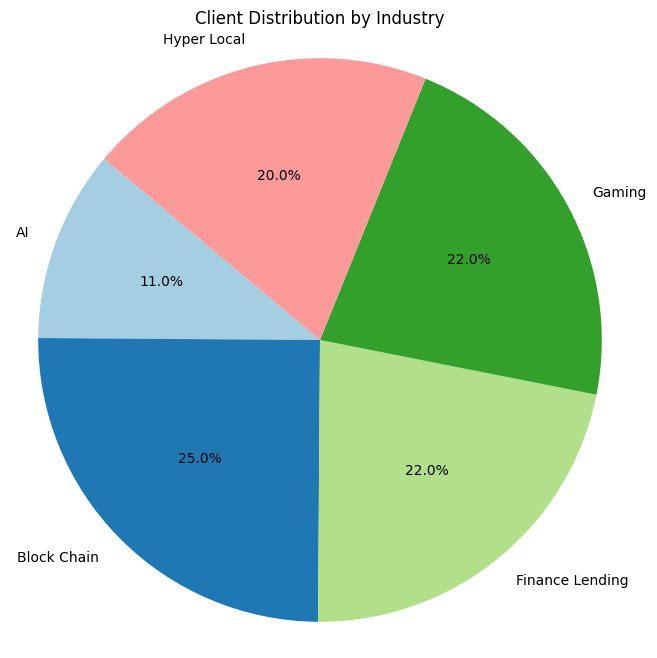

In [18]:
client_dist = industry_clients.groupby('industry')['client_id'].nunique()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(client_dist, labels=client_dist.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Paired.colors)
plt.title('Client Distribution by Industry')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

### **2.	Which industry in the organization has the highest renewal rate?**

In [28]:
merged_df = pd.merge(industry_clients, subscription_info, on='client_id', how='inner')

In [30]:
merged_df['renewed_status'] = merged_df['renewed'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

In [31]:
industry_counts = merged_df.groupby('industry')['client_id'].count().reset_index(name='total_clients')
industry_renewed = merged_df.groupby('industry')['renewed'].sum().reset_index(name='renewed_clients')

In [32]:
rate = pd.merge(industry_counts, industry_renewed, on='industry')
rate['renewal_rate'] = rate['renewed_clients'] / rate['total_clients']

In [33]:
top_industry = rate.loc[rate['renewal_rate'].idxmax()]
print(f"Industry with highest renewal rate:{top_industry}")

Industry with highest renewal rate:industry             Gaming
total_clients            22
renewed_clients          16
renewal_rate       0.727273
Name: 3, dtype: object


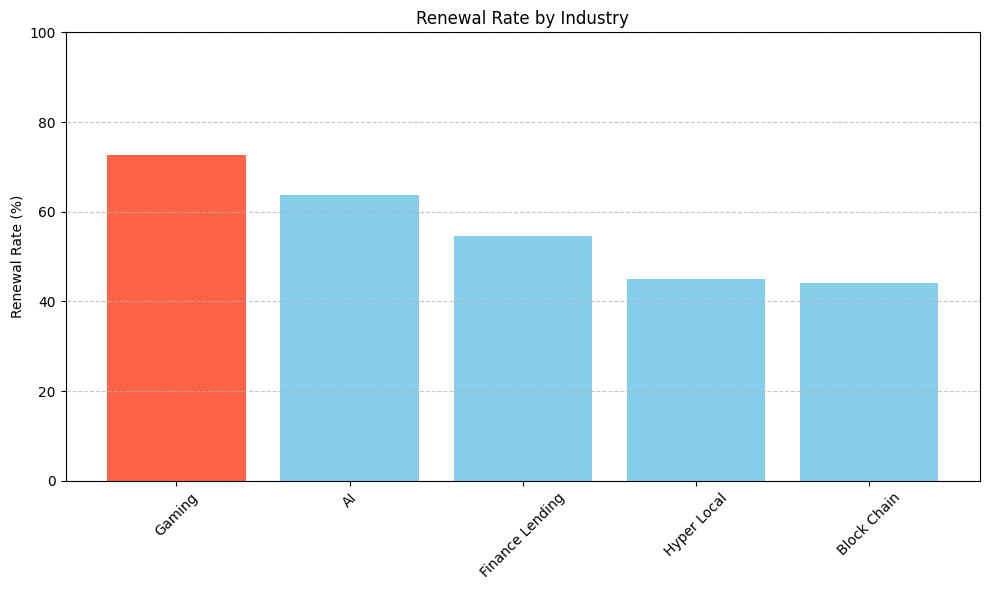

In [34]:
rate_sorted = rate.sort_values('renewal_rate', ascending=False)

colors = ['tomato' if industry == top_industry['industry'] else 'skyblue' for industry in rate_sorted['industry']]

plt.figure(figsize=(10,6))
plt.bar(rate_sorted['industry'], rate_sorted['renewal_rate'] * 100, color=colors)
plt.title('Renewal Rate by Industry')
plt.ylabel('Renewal Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **3.	What was the average inflation rate when their subscriptions were renewed?**

In [35]:
subscription_info['start_date'] = pd.to_datetime(subscription_info['start_date'], errors='coerce')
subscription_info['end_date'] = pd.to_datetime(subscription_info['end_date'], errors='coerce')

In [36]:
subscription_info['renewed'] = subscription_info['renewed'].astype(str).str.strip().str.lower() == 'yes'
renewed_subs = subscription_info[subscription_info['renewed'] == True].copy()

In [37]:
renewed_subs['key'] = 1
financial_info['key'] = 1

In [38]:
merged = pd.merge(renewed_subs, financial_info, on='key', suffixes=('_sub', '_fin'))

In [39]:
valid = merged[
    (merged['start_date_sub'] >= merged['start_date_fin']) &
    (merged['start_date_sub'] <= merged['end_date_fin'])
]

In [40]:
avg_inflation = valid['inflation_rate'].mean()
print("Average Inflation Rate for Renewed Subscriptions:", avg_inflation)

Average Inflation Rate for Renewed Subscriptions: nan


### 4.	What is the median amount paid each year for all payment methods?

In [41]:
payment_info['payment_date'] = pd.to_datetime(payment_info['payment_date'])

In [42]:
payment_info['year'] = payment_info['payment_date'].dt.year

In [43]:
median_by_year_method = payment_info.groupby(['year', 'payment_method'])['amount_paid'].median().reset_index()

In [44]:
print(f"Median amount paid each year for all payment methods:{median_by_year_method}")

Median amount paid each year for all payment methods:    year payment_method  amount_paid
0   2018  Bank Transfer       281.65
1   2018          Check       216.60
2   2018    Credit Card       229.15
3   2019  Bank Transfer       184.20
4   2019          Check       410.20
5   2019    Credit Card       401.90
6   2020  Bank Transfer       225.10
7   2020          Check       413.10
8   2020    Credit Card       285.25
9   2021  Bank Transfer       255.30
10  2021          Check       435.10
11  2021    Credit Card       208.70
12  2022  Bank Transfer       196.50
13  2022          Check       275.50
14  2022    Credit Card       326.20


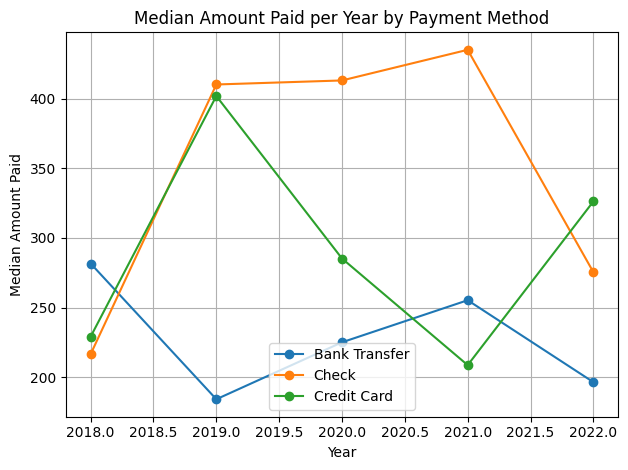

In [45]:
import matplotlib.pyplot as plt

for method in median_by_year_method['payment_method'].unique():
    data = median_by_year_method[median_by_year_method['payment_method'] == method]
    plt.plot(data['year'], data['amount_paid'], marker='o', label=method)

plt.title('Median Amount Paid per Year by Payment Method')
plt.xlabel('Year')
plt.ylabel('Median Amount Paid')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()